# Logistic Regression Problem 02

### Business Problem: Predicting Loan Default for a Bank

**Step 1: Generate the Dataset**

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 300  # Number of applicants

# Features
age = np.random.randint(18, 70, n_samples)                     # Age between 18 and 70
income = np.random.randint(20, 150, n_samples)                 # Income between 20k and 150k
credit_score = np.random.randint(300, 850, n_samples)          # Credit Score between 300 and 850
loan_amount = np.random.randint(5, 100, n_samples)             # Loan amount between 5k and 100k

# Target variable: Default (1 = Yes, 0 = No)
default = ((income < 50) & (credit_score < 600) & (loan_amount > 50))
default = default.astype(int)

# Create the DataFrame
loan_data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'CreditScore': credit_score,
    'LoanAmount': loan_amount,
    'Default': default
})

# Check the first few rows of the dataset
print(loan_data.head())


   Age  Income  CreditScore  LoanAmount  Default
0   56      28          552          78        1
1   69     118          689          42        0
2   46      67          555          10        0
3   32      73          749          76        0
4   60     139          309          27        0


**Step 2: Explore the Data**

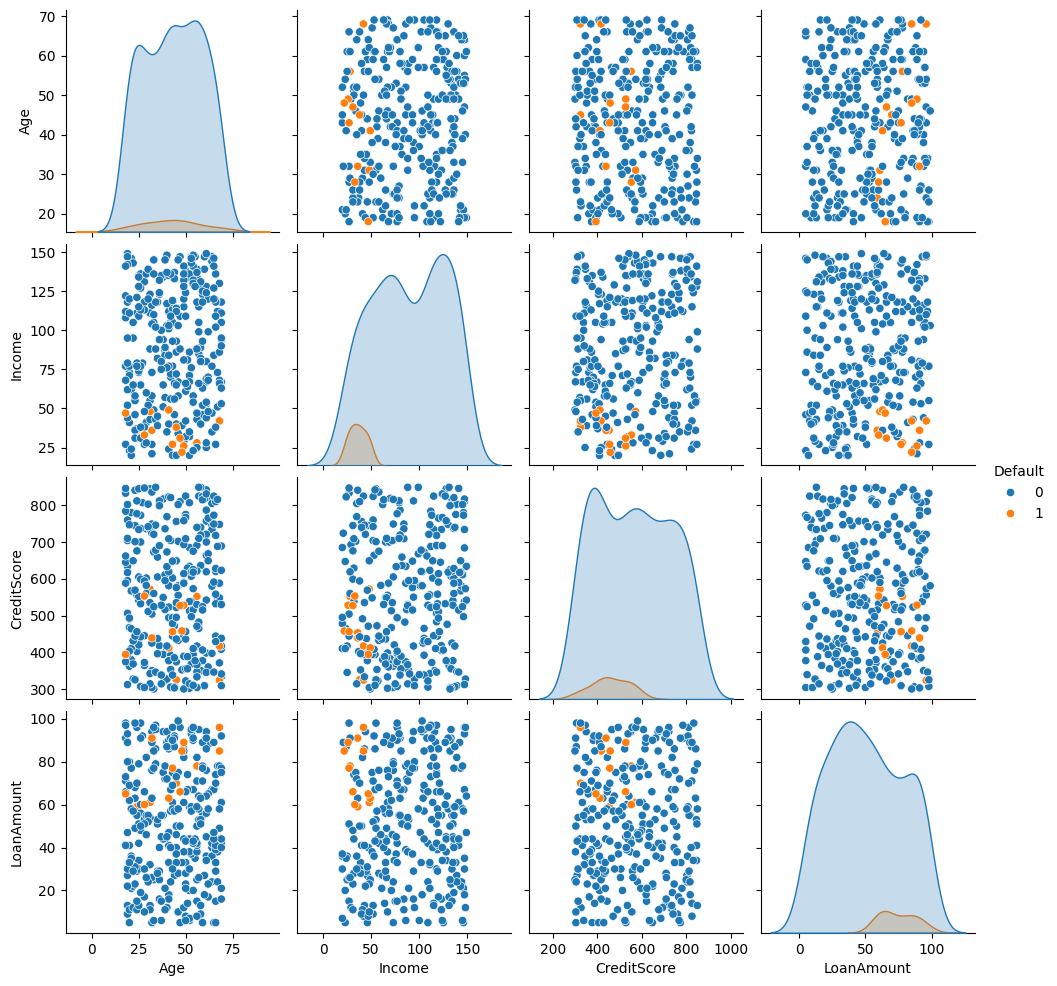

Default Rate in Dataset: 4.666666666666667 %


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(loan_data, hue="Default")
plt.show()

# Check default rate
print("Default Rate in Dataset:", loan_data['Default'].mean() * 100, "%")


**Step 3: Prepare the Data for Training**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = loan_data[['Age', 'Income', 'CreditScore', 'LoanAmount']]
y = loan_data['Default']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 4: Train the Logistic Regression Model**

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

**Step 5: Evaluate the Model**

C:\Users\rajas\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9833333333333333
Precision: 0.0
Recall: 0.0


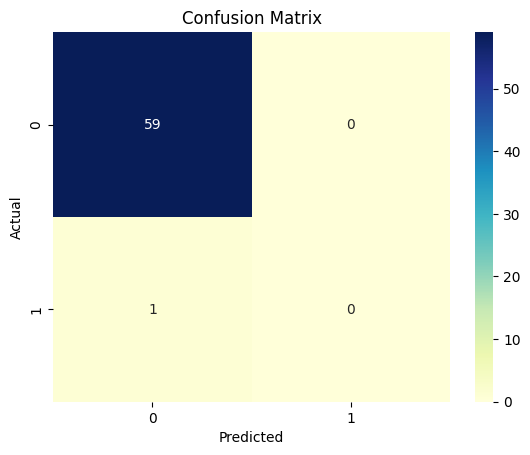

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Step 6: Interpret the Results**

**Accuracy of 98.3%:** The model correctly classified the loan status for 98.3% of the applicants in the test set. This seems like high accuracy, but it’s important to look at precision and recall to get a full picture.

**Precision and Recall of 0.0:** Both precision and recall are 0, which suggests the model did not correctly identify any defaults (all default predictions were incorrect).